## ***Load Libraries***

In [1]:
%pip install lime

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

c:\Users\PLubi\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\PLubi\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\PLubi\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [6]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
#!pip uninstall keras
#!pip install keras==2.11

In [10]:
%pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install lime

Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
nltk.download('punkt_tab')
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.feature_extraction.text import CountVectorizer
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from tqdm.notebook import tqdm
from tensorflow.keras.models import load_model
from lime.lime_text import LimeTextExplainer
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from collections import Counter
import plotly.express as px
from plotly import colors
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras.layers import GRU, Dropout, Dense
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PLubi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PLubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PLubi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
c:\Users\PLubi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## ***Load Dataset***

In [17]:
# Folder path
folder_path = r'C:\Users\PLubi\OneDrive - Sol Plaatje University\Desktop\Nedbank\data'

In [18]:
# -----------------------------
# .Capitec
# -----------------------------
df = pd.read_csv(os.path.join(folder_path, 'nedbank_reviews.csv'), parse_dates=['at', 'repliedAt'])
print("Nedbank:", df.shape)

Nedbank: (35016, 11)


In [19]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,05b5f11a-0960-4337-aabc-ad23736f2f19,Marumo Mokon,https://play-lh.googleusercontent.com/a/ACg8oc...,I like this app,5,0,9.4.1-0-prod,2024-12-31 21:25:53,We’re pleased that you’re enjoying the app. Th...,2025-01-03 08:10:31,9.4.1-0-prod
1,923cd3b1-7661-4eac-8318-f5976f9bc43c,Jason Louw,https://play-lh.googleusercontent.com/a/ACg8oc...,Very good.just that nedbank is now getting to ...,5,0,9.4.3-0-prod,2024-12-31 17:29:04,We’re glad that you like the Money app. Your s...,2025-01-03 08:10:12,9.4.3-0-prod
2,9b535cf5-f801-4b1a-9849-a82cf330790e,Patrick Songambandu,https://play-lh.googleusercontent.com/a/ACg8oc...,Struggling to do anything,1,0,9.4.3-0-prod,2024-12-31 14:53:36,Thank you for the feedback. We don’t fully und...,2025-01-03 08:44:29,9.4.3-0-prod
3,7bdc1847-1ea7-44a5-9e4b-afc110c0dfb0,Molwantwa James Kubheka,https://play-lh.googleusercontent.com/a/ACg8oc...,I need to download nedbank app,5,0,NaN,2024-12-31 14:31:28,Thank you for the positive review. If you need...,2025-01-03 08:09:31,NaN
4,70406f94-f236-4dff-88fd-6fa29e8f130c,Mpho Maubane,https://play-lh.googleusercontent.com/a-/ALV-U...,Great security,5,0,9.4.3-0-prod,2024-12-31 14:11:00,That’s what we’re aiming for! Thank you for th...,2025-01-03 08:08:32,9.4.3-0-prod


# ***EDA***

In [20]:
# Display summary information about the dataset
print("\nSummary information about the dataset:")
print(df.info())


Summary information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35016 entries, 0 to 35015
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              35016 non-null  object        
 1   userName              35016 non-null  object        
 2   userImage             35016 non-null  object        
 3   content               35006 non-null  object        
 4   score                 35016 non-null  int64         
 5   thumbsUpCount         35016 non-null  int64         
 6   reviewCreatedVersion  29697 non-null  object        
 7   at                    35016 non-null  datetime64[ns]
 8   replyContent          34869 non-null  object        
 9   repliedAt             34869 non-null  datetime64[ns]
 10  appVersion            29697 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.9+ MB
None


In [21]:
# statistics for numerical columns
print("\nBasic statistics for numerical columns:")
df.describe()


Basic statistics for numerical columns:


,score,thumbsUpCount,at,repliedAt
count,35016.000000,35016.000000,35016,34869
mean,3.912126,2.209276,2021-02-17 13:26:18.630169088,2021-02-12 06:45:44.563939328
min,1.000000,0.000000,2017-10-16 07:25:15,2017-11-04 10:40:21
25%,3.000000,0.000000,2020-01-08 21:21:48.500000,2019-12-20 14:22:19
50%,5.000000,0.000000,2021-01-22 07:11:53,2021-01-21 14:11:21
75%,5.000000,0.000000,2022-04-27 09:40:11.750000128,2022-04-26 12:41:52
max,5.000000,3521.000000,2024-12-31 21:25:53,2025-01-03 08:44:29
std,1.611793,35.420559,NaN,NaN


In [22]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


reviewId                   0
userName                   0
userImage                  0
content                   10
score                      0
thumbsUpCount              0
reviewCreatedVersion    5319
at                         0
replyContent             147
repliedAt                147
appVersion              5319
dtype: int64

In [23]:
# Display the distribution of scores
print("\nDistribution of scores:")
df['score'].value_counts()


Distribution of scores:


score
5    21977
1     6920
4     3167
3     1610
2     1342
Name: count, dtype: int64

In [24]:
# Display the distribution of thumbs up count
print("\nDistribution of thumbs up count:")
df['thumbsUpCount'].value_counts()


Distribution of thumbs up count:


thumbsUpCount
0      28653
1       3032
2        983
3        548
4        351
       ...  
152        1
94         1
188        1
144        1
486        1
Name: count, Length: 209, dtype: int64

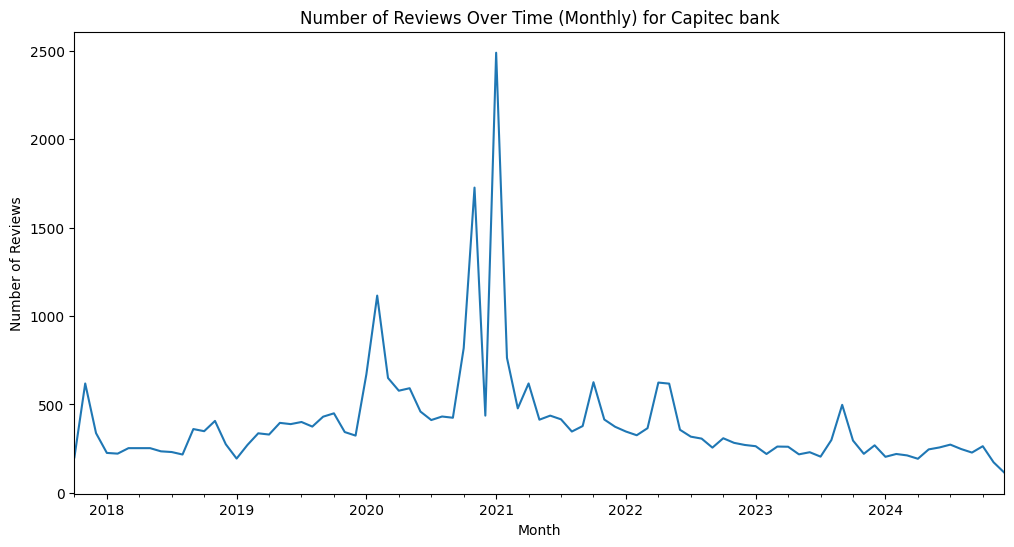

In [25]:
# Overall reviews over time
df['at'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Number of Reviews Over Time (Monthly) for Capitec bank')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

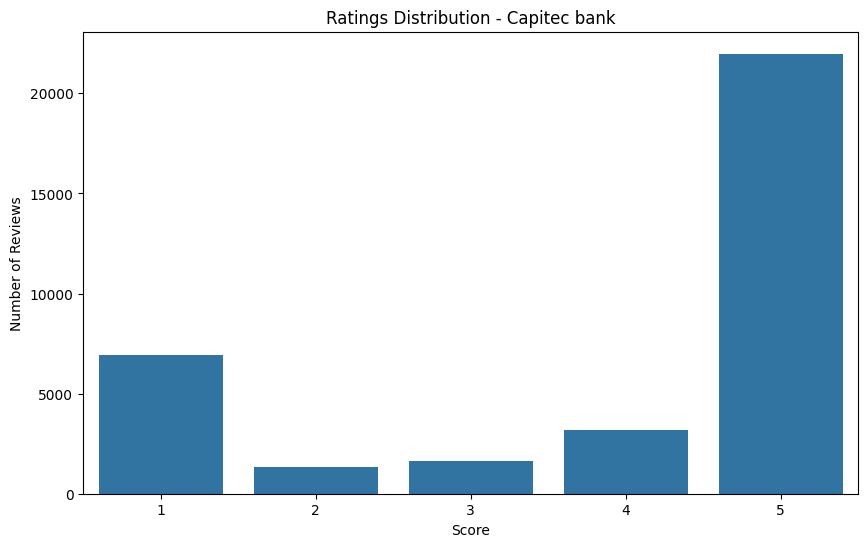

In [26]:
# Count reviews per score
counts = (
    df.groupby('score')
    .size()
    .reset_index(name='count')
)

# Sort and plot
counts = counts.sort_values('score')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=counts,
    x='score',
    y='count',
    order=[1, 2, 3, 4, 5]
)

plt.title('Ratings Distribution - Capitec bank')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.show()

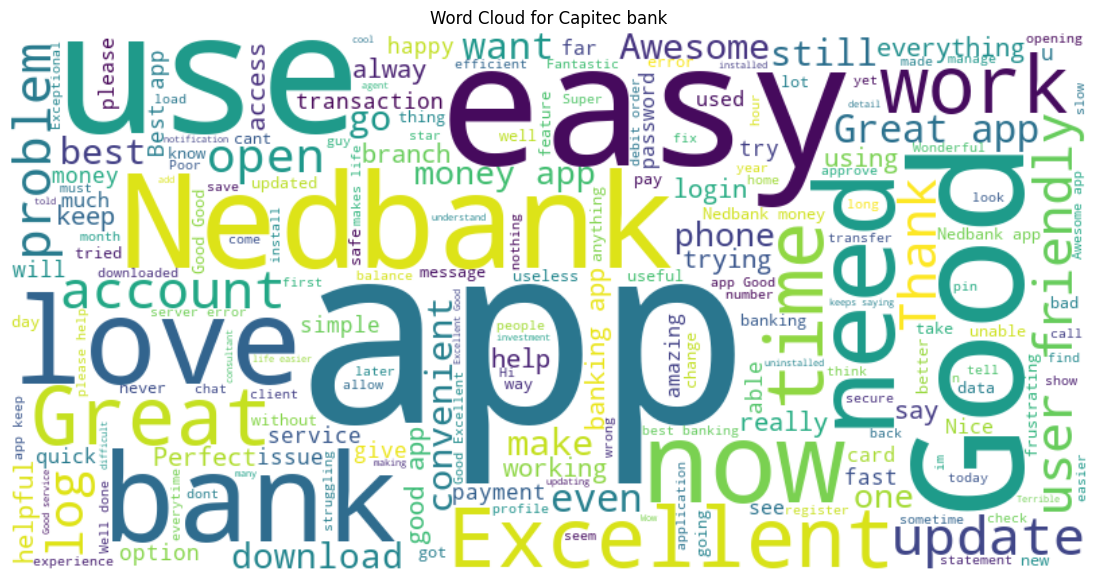

In [27]:
# Overall Word Cloud
all_text = " ".join(df['content'].dropna().astype(str))

wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Capitec bank')
plt.show()

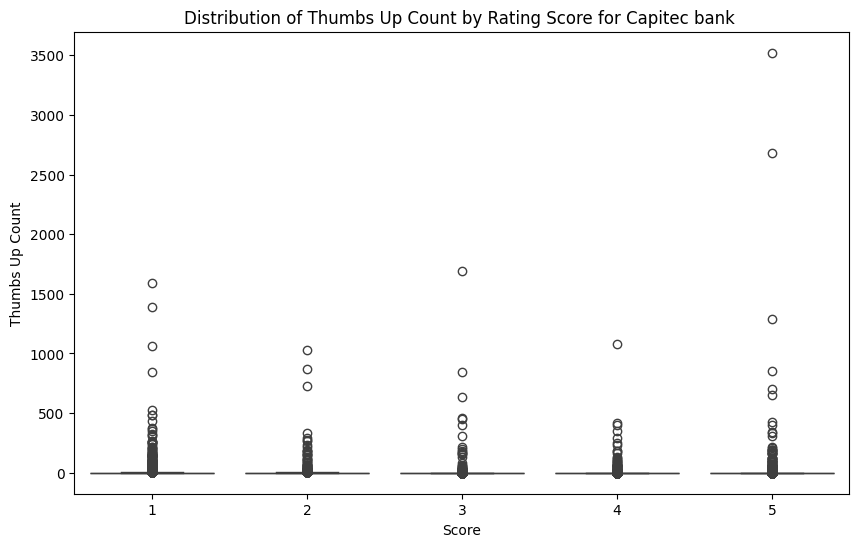

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='score', y='thumbsUpCount')
plt.title('Distribution of Thumbs Up Count by Rating Score for Capitec bank ')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.show()

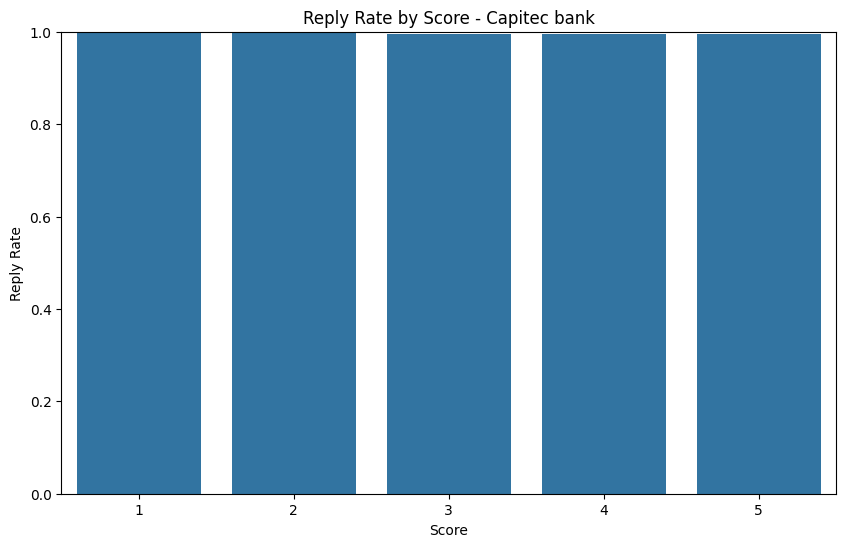

In [29]:
# Add reply flag
df['has_reply'] = df['replyContent'].notnull()

# Group by score only (no Bank_Name)
reply_rate_by_score = (
    df.groupby('score')['has_reply']
    .mean()
    .reset_index()
)

#  Sort by score
reply_rate_by_score = reply_rate_by_score.sort_values('score')

#  Plot: simple bar plot, no hue needed
plt.figure(figsize=(10, 6))
sns.barplot(
    data=reply_rate_by_score,
    x='score',
    y='has_reply',
    order=[1, 2, 3, 4, 5]
)

# Labels & title
plt.xlabel("Score")
plt.ylabel("Reply Rate")
plt.title("Reply Rate by Score - Capitec bank")
plt.ylim(0, 1)
plt.show()


# ***Data Cleaning and Preprocessing***

In [30]:
# Drop rows where review text is missing
df = df.dropna(subset=['content']).reset_index(drop=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35006 entries, 0 to 35005
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              35006 non-null  object        
 1   userName              35006 non-null  object        
 2   userImage             35006 non-null  object        
 3   content               35006 non-null  object        
 4   score                 35006 non-null  int64         
 5   thumbsUpCount         35006 non-null  int64         
 6   reviewCreatedVersion  29689 non-null  object        
 7   at                    35006 non-null  datetime64[ns]
 8   replyContent          34859 non-null  object        
 9   repliedAt             34859 non-null  datetime64[ns]
 10  appVersion            29689 non-null  object        
 11  has_reply             35006 non-null  bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(7)
memory usage: 3.0+ MB


In [32]:
# ================================================
#  STEP 2: Keep useful columns
# ================================================
# Example: using your combined_df
columns_to_keep = ['content', 'score', 'at','thumbsUpCount', 'appVersion']
df = df[columns_to_keep].copy()


In [33]:
# Fill missing appVersion with 'unknown'
df['appVersion'] = df['appVersion'].fillna('unknown')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35006 entries, 0 to 35005
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content        35006 non-null  object        
 1   score          35006 non-null  int64         
 2   at             35006 non-null  datetime64[ns]
 3   thumbsUpCount  35006 non-null  int64         
 4   appVersion     35006 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.3+ MB


## **FEATURE ENGINEERING**

In [35]:
def label_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

# Apply the function to create a new 'sentiment' column
df['sentiment'] = df['score'].apply(label_sentiment)

# Print the value counts of the 'sentiment' column
print(df['sentiment'].value_counts())


sentiment
positive    25137
negative     8261
neutral      1608
Name: count, dtype: int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35006 entries, 0 to 35005
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content        35006 non-null  object        
 1   score          35006 non-null  int64         
 2   at             35006 non-null  datetime64[ns]
 3   thumbsUpCount  35006 non-null  int64         
 4   appVersion     35006 non-null  object        
 5   sentiment      35006 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.6+ MB


In [37]:
df.head()

,content,score,at,thumbsUpCount,appVersion,sentiment
0,I like this app,5,2024-12-31 21:25:53,0,9.4.1-0-prod,positive
1,Very good.just that nedbank is now getting to ...,5,2024-12-31 17:29:04,0,9.4.3-0-prod,positive
2,Struggling to do anything,1,2024-12-31 14:53:36,0,9.4.3-0-prod,negative
3,I need to download nedbank app,5,2024-12-31 14:31:28,0,unknown,positive
4,Great security,5,2024-12-31 14:11:00,0,9.4.3-0-prod,positive


In [38]:
temp = df.groupby('sentiment').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,content
2,positive,25137
0,negative,8261
1,neutral,1608


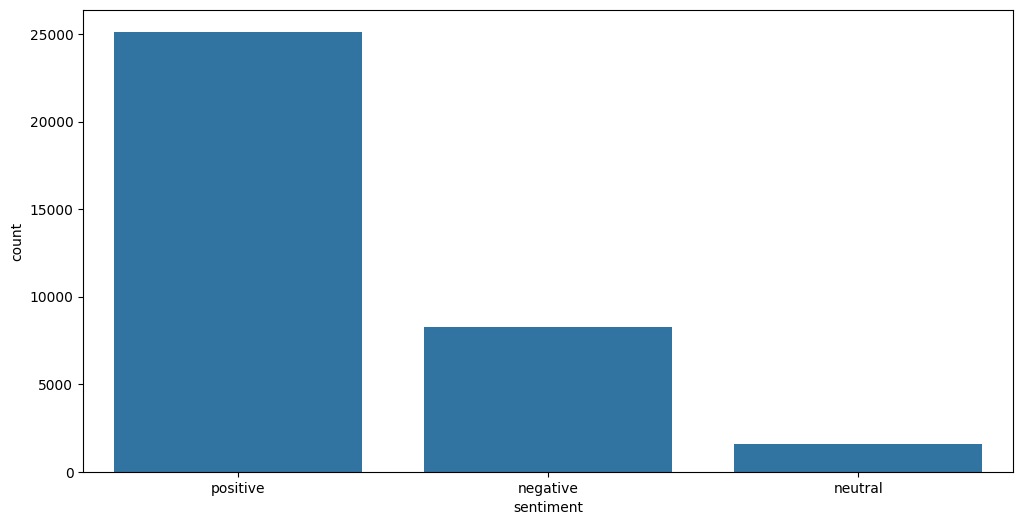

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)
plt.show()

In [40]:
%pip install contractions


Note: you may need to restart the kernel to use updated packages.


In [41]:
# =========================
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# =========================
#  TEXT CLEANING FUNCTION
# =========================
stop_words = set(stopwords.words('english')) - {'no', 'not'}
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Expand contractions
    text = contractions.fix(text)
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove non-letters (keep alphabet and space)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords (preserving negations) + lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    
    return ' '.join(tokens)

df['clean_content'] = df['content'].apply(clean_text)


In [42]:
df.head()

,content,score,at,thumbsUpCount,appVersion,sentiment,clean_content
0,I like this app,5,2024-12-31 21:25:53,0,9.4.1-0-prod,positive,like app
1,Very good.just that nedbank is now getting to ...,5,2024-12-31 17:29:04,0,9.4.3-0-prod,positive,goodjust nedbank getting expensive
2,Struggling to do anything,1,2024-12-31 14:53:36,0,9.4.3-0-prod,negative,struggling anything
3,I need to download nedbank app,5,2024-12-31 14:31:28,0,unknown,positive,need download nedbank app
4,Great security,5,2024-12-31 14:11:00,0,9.4.3-0-prod,positive,great security


# **Insightful Visualization**

In [43]:
df['temp_list'] = df['clean_content'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,app,15825
1,not,9243
2,good,5193
3,easy,3665
4,use,3395
5,nedbank,3325
6,great,2507
7,bank,2367
8,excellent,2163
9,money,2063


In [44]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [45]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [46]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [47]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))

In [48]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,good,5193
2,easy,3665
3,use,3395
4,nedbank,3325
5,great,2507
6,bank,2367
7,excellent,2163
8,money,2063
9,time,2042
10,best,1823


## **Most Common words in Text**

In [49]:
df['temp_list1'] = df['content'].apply(lambda x:str(x).split())
df['temp_list1'] = df['temp_list1'].apply(lambda x:remove_stopword(x))

In [50]:
top = Counter([item for sublist in df['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,app,11240
2,use,2710
3,Good,2588
4,easy,2587
5,good,2371
6,Nedbank,1969
7,Very,1942
8,The,1925
9,This,1794
10,It,1785


In [51]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

## **Most common words Sentiments Wise**

In [52]:
Positive_sent = df[df['sentiment']=='positive']
Negative_sent = df[df['sentiment']=='negative']
Neutral_sent = df[df['sentiment']=='neutral']

### Most common positive words

In [53]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,app,8559
1,good,4564
2,easy,3481
3,use,2606
4,great,2328
5,excellent,2118
6,nedbank,2107
7,best,1767
8,love,1638
9,bank,1401


In [54]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

### Most common Negative words

In [55]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,time,1105
2,nedbank,1086
3,update,990
4,even,870
5,bank,859
6,log,840
7,money,810
8,open,776
9,account,775
10,keep,768


In [56]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon negative Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

### Most common Neutral words

In [57]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,good,288
2,update,156
3,account,156
4,money,143
5,use,134
6,nedbank,132
7,time,123
8,please,120
9,need,107
10,bank,107


In [58]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

## **Wordcloud**

In [59]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=400,
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()
d = '/kaggle/input/masks-for-wordclouds/'

In [60]:
cyberpunk_palette = ["#FF00FF", "#00FF00", "#0000FF"]
template = "plotly_dark"

In [61]:
# Word Length Distribution
word_lengths = [len(word) for text in df['content'] for word in text.split()]
word_lengths_counts = {length: word_lengths.count(length) for length in set(word_lengths)}

# Sort the word lengths by count in descending order
sorted_word_lengths = sorted(word_lengths_counts.items(), key=lambda x: x[1], reverse=True)
# Create a custom colorscale with a fixed number of colors
colorscale = colors.sample_colorscale('Viridis', len(word_lengths_counts))

In [62]:
# Create the bar chart trace
bar_trace = go.Bar(
    x=[length for length, count in sorted_word_lengths],
    y=[count for length, count in sorted_word_lengths],
    marker=dict(
        color=[colorscale[i] for i in range(len(sorted_word_lengths))],
        line=dict(
            color=cyberpunk_palette[0],
            width=2
        )
    ),
    hovertemplate='Word Length: %{x}<br>Count: %{y}<extra></extra>'
)

In [63]:
# Create the neon light effect trace
light_effect_trace = go.Scatter(
    x=[length for length, count in sorted_word_lengths],
    y=[count * 1.05 for length, count in sorted_word_lengths],
    mode='lines',
    line=dict(
        color=cyberpunk_palette[1],
        width=5
    ),
    hoverinfo='skip'
)

In [64]:
# Create the layout
layout = go.Layout(
    title="Word Length Distribution",
    xaxis=dict(
        title="Word Length",
        tickfont=dict(color=cyberpunk_palette[2])
    ),
    yaxis=dict(
        title="Count",
        tickfont=dict(color=cyberpunk_palette[2])
    ),
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color=cyberpunk_palette[2],
    title_font_color=cyberpunk_palette[2],
    title_font_size=20,
    margin=dict(t=80, l=100, r=50, b=100)
)

# Create the figure and show it
fig = go.Figure(data=[bar_trace, light_effect_trace], layout=layout)
fig.show()

In [65]:
# Sentence Length Distribution
sentence_lengths = [len(text.split()) for text in df['content']]

# Create a custom colorscale with a fixed number of colors
colorscale = colors.sample_colorscale('Viridis', len(set(sentence_lengths)))

bar_trace = go.Bar(
    x=sorted(set(sentence_lengths)),
    y=[sentence_lengths.count(length) for length in sorted(set(sentence_lengths))],
    marker=dict(
        color=[colorscale[i] for i in range(len(set(sentence_lengths)))],
        line=dict(
            color=cyberpunk_palette[0],
            width=2
        )
    ),
    hovertemplate='Sentence Length: %{x}<br>Count: %{y}<extra></extra>'
)

In [66]:
light_effect_trace = go.Scatter(
    x=sorted(set(sentence_lengths)),
    y=[sentence_lengths.count(length) * 1.05 for length in sorted(set(sentence_lengths))],
    mode='lines',
    line=dict(
        color=cyberpunk_palette[1],
        width=5
    ),
    hoverinfo='skip'
)

In [67]:
layout = go.Layout(
    title="Sentence Length Distribution",
    xaxis=dict(
        title="Sentence Length",
        tickfont=dict(color=cyberpunk_palette[2])
    ),
    yaxis=dict(
        title="Count",
        tickfont=dict(color=cyberpunk_palette[2])
    ),
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color=cyberpunk_palette[2],
    title_font_color=cyberpunk_palette[2],
    title_font_size=20,
    margin=dict(t=80, l=100, r=50, b=100)
)
fig = go.Figure(data=[bar_trace, light_effect_trace], layout=layout)
fig.show()

### Word cloud for positive Sentiment

In [68]:
# Word Cloud for Positive Sentiment
positive_text = ' '.join(df[df['sentiment'] == 'positive']['content'])
wordcloud = WordCloud(background_color='black', width = 800, height = 400, max_words=200, colormap='Greens').generate(positive_text)
fig = go.Figure(go.Image(z = np.dstack((wordcloud.to_array(), wordcloud.to_array(), wordcloud.to_array()))))
fig.update_layout(
    title = 'Word Cloud For Positive Sentiment',
    template = template,
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = cyberpunk_palette[2],
    title_font_color = cyberpunk_palette[2],
    title_font_size = 20,
    margin = dict(t = 80, l = 50, r = 50, b = 50)
)
fig.show()

### word cloud for Negative Sentiment

In [69]:
# Word Cloud for Negative Sentiment
negative_text = ' '.join(df[df['sentiment'] == 'negative']['content'])
wordcloud = WordCloud(background_color='black', width=800, height=400, max_words=200, colormap='Reds').generate(negative_text)
fig = go.Figure(go.Image(z=np.dstack((wordcloud.to_array(), wordcloud.to_array(), wordcloud.to_array()))))
fig.update_layout(
    title="Word Cloud for Negative Sentiment",
    template=template,
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color=cyberpunk_palette[2],
    title_font_color=cyberpunk_palette[2],
    title_font_size=20,
    margin=dict(t=80, l=50, r=50, b=50)
)
fig.show()

### word cloud for Neutral Sentiment

In [70]:
# Word Cloud for Neutral Sentiment
neutral_text = ' '.join(df[df['sentiment'] == 'neutral']['content'])
wordcloud = WordCloud(background_color='black', width=800, height=400, max_words=200, colormap='Blues').generate(neutral_text)
fig = go.Figure(go.Image(z=np.dstack((wordcloud.to_array(), wordcloud.to_array(), wordcloud.to_array()))))
fig.update_layout(
    title="Word Cloud for Neutral Sentiment",
    template=template,
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color=cyberpunk_palette[2],
    title_font_color=cyberpunk_palette[2],
    title_font_size=20,
    margin=dict(t=80, l=50, r=50, b=50)
)
fig.show()

# ***MODELS BUILDING***

## **BERT EMBEDDING**

In [71]:
%pip install -U sentence-transformers


Note: you may need to restart the kernel to use updated packages.


In [72]:
from sentence_transformers import SentenceTransformer

In [73]:
# =========================
# 1️⃣ Sentence Transformer Embeddings
# =========================
model = SentenceTransformer('all-MiniLM-L6-v2')
df['embedding'] = list(
    model.encode(df['clean_content'].tolist(), batch_size=32, show_progress_bar=True)
)
df['day'] = df['at'].dt.to_period('D').astype(str)

Batches: 100%|██████████| 1094/1094 [00:53<00:00, 20.44it/s]


# Data leakage Handling and preprocessing

In [74]:
# =========================
# 2️⃣ Daily Aggregations
# =========================
daily_embeddings = df.groupby('day')['embedding'].apply(lambda emb: np.mean(np.stack(emb), axis=0)).reset_index()
daily_scores = df.groupby('day')['score'].mean().reset_index()
failures_per_day = df[df['score'] < 3].groupby('day').size().reset_index(name='failures_count')
total_per_day = df.groupby('day').size().reset_index(name='total_count')

daily_data = (
    daily_embeddings
    .merge(daily_scores, on='day')
    .merge(failures_per_day, on='day', how='left')
    .merge(total_per_day, on='day', how='left')
)
daily_data['failures_count'] = daily_data['failures_count'].fillna(0).astype(int)
daily_data['failure'] = (daily_data['score'] < 3).astype(int)

In [75]:
# =========================
# 3️⃣ Feature Engineering (Score-based features)
# =========================
daily_data['score_lag1'] = daily_data['score'].shift(1).fillna(daily_data['score'].mean())
daily_data['score_ratio'] = daily_data['score_lag1'] / (daily_data['score'] + 1e-6)

daily_data['score_roll_mean'] = (
    daily_data['score'].shift(1)
    .rolling(window=3, min_periods=1)
    .mean()
    .fillna(daily_data['score'].mean())
)

daily_data['score_roll_std'] = (
    daily_data['score'].shift(1)
    .rolling(window=3, min_periods=1)
    .std()
    .fillna(0)
)

daily_data['score_delta'] = daily_data['score'] - daily_data['score_lag1']

In [76]:
daily_data

,day,embedding,score,failures_count,total_count,failure,score_lag1,score_ratio,score_roll_mean,score_roll_std,score_delta
0,2017-10-16,"[-0.060089707, 0.007179311, -0.010648652, -0.0...",4.805970,1,67,0,3.902031,0.811913,3.902031,0.000000,0.903939
1,2017-10-17,"[-0.047699835, 0.0048278756, -0.016101493, -0....",4.675676,2,37,0,4.805970,1.027866,4.805970,0.000000,-0.130294
2,2017-10-18,"[-0.07258853, 0.015110556, 0.0019812754, -0.04...",4.916667,0,12,0,4.675676,0.950985,4.740823,0.092132,0.240991
3,2017-10-19,"[-0.043888677, -0.004601853, -0.022257842, -0....",4.666667,0,12,0,4.916667,1.053571,4.799437,0.120628,-0.250000
4,2017-10-20,"[-0.04782317, 0.016522164, -0.00414974, -0.039...",4.937500,0,16,0,4.666667,0.945147,4.753003,0.141808,0.270833
...,...,...,...,...,...,...,...,...,...,...,...
2628,2024-12-27,"[0.03055357, -0.066259705, 0.061242867, -0.081...",2.000000,1,1,1,3.200000,1.599999,3.511111,0.719053,-1.200000
2629,2024-12-28,"[-0.010756679, 0.005653835, -0.028213458, -0.0...",3.500000,1,4,0,2.000000,0.571428,3.177778,1.166825,1.500000
2630,2024-12-29,"[-0.07159007, 0.0076983077, -0.010560936, -0.0...",3.750000,1,4,0,3.500000,0.933333,2.900000,0.793725,0.250000
2631,2024-12-30,"[-0.062465556, -0.018956652, -0.012050399, 0.0...",5.000000,0,4,0,3.750000,0.750000,3.083333,0.946485,1.250000


## Train/Test split by Day (before fitting)

In [77]:
# =========================
# 4️⃣ Train/Test Split
# =========================
daily_data['day'] = pd.to_datetime(daily_data['day'])
split_idx = int(len(daily_data) * 0.8)
train_days = daily_data['day'].iloc[:split_idx]
test_days = daily_data['day'].iloc[split_idx:]

df['day'] = pd.to_datetime(df['day'])
df_train = df[df['day'].isin(train_days)]
df_test = df[df['day'].isin(test_days)]

## Fit LDA Vectors on Training Only

In [78]:
# =========================
# 5️⃣ LDA Topic Modeling
# =========================
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_counts_train = vectorizer.fit_transform(df_train['clean_content'])
X_counts_test = vectorizer.transform(df_test['clean_content'])

# Choose best n topics using training only
topic_range = range(2, 21)
perplexities = []
for n in topic_range:
    lda = LatentDirichletAllocation(n_components=n, random_state=42)
    lda.fit(X_counts_train)
    perplexities.append(lda.perplexity(X_counts_train))

best_n = topic_range[np.argmin(perplexities)]
lda_final = LatentDirichletAllocation(n_components=best_n, random_state=42)
lda_train = lda_final.fit_transform(X_counts_train)
lda_test = lda_final.transform(X_counts_test)

df_train['lda_vector'] = list(lda_train)
df_test['lda_vector'] = list(lda_test)

def aggregate_daily(df_subset):
    daily_emb = df_subset.groupby('day')['embedding'].apply(lambda e: np.mean(np.stack(e), axis=0)).reset_index()
    daily_lda = df_subset.groupby('day')['lda_vector'].apply(lambda v: np.mean(np.stack(v), axis=0)).reset_index()
    return daily_emb.merge(daily_lda, on='day')

daily_train = aggregate_daily(df_train).merge(daily_data, on='day')
daily_test = aggregate_daily(df_test).merge(daily_data, on='day')

C:\Users\PLubi\AppData\Local\Temp\ipykernel_18180\3162645801.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PLubi\AppData\Local\Temp\ipykernel_18180\3162645801.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
# =========================
# 6️⃣ PCA Dimensionality Reduction
# =========================
bert_array_train = np.vstack(daily_train['embedding_x'].values)
lda_array_train = np.vstack(daily_train['lda_vector'].values)

pca_bert = PCA(n_components=0.95, random_state=42)
bert_pca_train = pca_bert.fit_transform(bert_array_train)

pca_lda = PCA(n_components=0.95, random_state=42)
lda_pca_train = pca_lda.fit_transform(lda_array_train)

bert_array_test = np.vstack(daily_test['embedding_x'].values)
lda_array_test = np.vstack(daily_test['lda_vector'].values)

bert_pca_test = pca_bert.transform(bert_array_test)
lda_pca_test = pca_lda.transform(lda_array_test)

daily_train['embedding_pca'] = list(np.hstack([bert_pca_train, lda_pca_train]))
daily_test['embedding_pca'] = list(np.hstack([bert_pca_test, lda_pca_test]))

In [80]:
from sklearn.preprocessing import StandardScaler

# Define structured features
struct_features = [
    'score', 'total_count',
    'score_lag1', 'score_ratio',
    'score_roll_mean', 'score_roll_std',
    'score_delta'
]

# Initialize scaler
scaler_struct = StandardScaler()

# Fit on training data and transform
X_struct_train = scaler_struct.fit_transform(daily_train[struct_features])
X_struct_test = scaler_struct.transform(daily_test[struct_features])

In [81]:
# =========================
# 7️⃣ Target: failures_count
# =========================
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(daily_train[['failures_count']]).flatten()
y_test_scaled = scaler_y.transform(daily_test[['failures_count']]).flatten()

# =========================
# 8️⃣ Combine embeddings + struct
# =========================
X_train = np.hstack([np.vstack(daily_train['embedding_pca']), X_struct_train])
X_test = np.hstack([np.vstack(daily_test['embedding_pca']), X_struct_test])

print("Train:", X_train.shape, y_train_scaled.shape)
print("Test:", X_test.shape, y_test_scaled.shape)

Train: (2106, 197) (2106,)
Test: (527, 197) (527,)


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# =========================
# Create Sequences for RNN
# =========================
window_size = 3

def create_sequences(X, y, window_size):
    """
    Convert feature and target arrays into rolling windows for RNN input.
    X: shape (num_samples, feature_dim)
    y: shape (num_samples,)
    Returns:
        X_seq: shape (num_sequences, window_size, feature_dim)
        y_seq: shape (num_sequences,)
    """
    X_seq, y_seq = [], []
    
    # Start from window_size to predict the next step after the window
    for i in range(window_size, len(X)):
        # Take the previous `window_size` steps as input
        X_seq.append(X[i-window_size:i])
        
        # Take the current step as the target (next step)
        y_seq.append(y[i])
        
    return np.array(X_seq), np.array(y_seq)

# Ensure inputs are numpy arrays
X_train = np.array(X_train)
y_train_scaled = np.array(y_train_scaled)
X_test = np.array(X_test)
y_test_scaled = np.array(y_test_scaled)

# Generate sequences
X_train_seq, y_train_seq = create_sequences(X_train, y_train_scaled, window_size)
X_test_seq, y_test_seq = create_sequences(X_test, y_test_scaled, window_size)

print("Train sequences:", X_train_seq.shape, y_train_seq.shape)
print("Test sequences:", X_test_seq.shape, y_test_seq.shape)

Train sequences: (2103, 3, 197) (2103,)
Test sequences: (524, 3, 197) (524,)


# RNN-LSTM

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    SimpleRNN(64, activation='tanh', return_sequences=True,
              input_shape=(window_size, X_train_seq.shape[2]), kernel_regularizer=l2(0.0001)),
    LSTM(32, activation='tanh', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(1, activation='linear', kernel_regularizer=l2(0.0001))
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/30


c:\Users\PLubi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0245 - mae: 0.0481 - val_loss: 0.0150 - val_mae: 0.0179
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mae: 0.0247 - val_loss: 0.0102 - val_mae: 0.0166
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mae: 0.0209 - val_loss: 0.0076 - val_mae: 0.0137
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mae: 0.0190 - val_loss: 0.0064 - val_mae: 0.0181
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mae: 0.0189 - val_loss: 0.0053 - val_mae: 0.0149
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mae: 0.0189 - val_loss: 0.0048 - val_mae: 0.0168
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mae: 0.0183 - val_loss: 0.0042 - val_mae: 0.0166
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mae: 0.0185 - val_loss: 0.0036 - val_mae: 0.0130
Epoch 9/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mae: 0.0183 - v

In [84]:
# =========================
# 2️⃣ Evaluate the model on test set (target: failures_count)
# =========================
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.ndimage import gaussian_filter1d

# Evaluate directly from the model
loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f"\nTest MAE (raw, from model.evaluate): {mae:.4f}")

# Predict failures_count on test sequence data
y_pred = model.predict(X_test_seq).flatten()

# Compute regression metrics (raw)
mse = mean_squared_error(y_test_seq, y_pred)
r2 = r2_score(y_test_seq, y_pred)
print(f"\nRaw Results (no smoothing) for failures_count")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Smooth predictions and actual values
y_pred_smoothed = gaussian_filter1d(y_pred, sigma=1.5)
y_test_smoothed = gaussian_filter1d(y_test_seq, sigma=1.5)

# Metrics for smoothed results
mse_smooth = mean_squared_error(y_test_smoothed, y_pred_smoothed)
mae_smooth = mean_absolute_error(y_test_smoothed, y_pred_smoothed)
r2_smooth = r2_score(y_test_smoothed, y_pred_smoothed)

print(f"\nSmoothed Results (Gaussian filter) for failures_count")
print(f"Mean Absolute Error (MAE): {mae_smooth:.4f}")
print(f"Mean Squared Error (MSE): {mse_smooth:.4f}")
print(f"R² Score: {r2_smooth:.4f}")

# Sample predictions vs actual (smoothed)
print("\nSample Smoothed Predictions vs Actual failures_count:")
for actual, predicted in zip(y_test_smoothed[:10], y_pred_smoothed[:10]):
    print(f"Actual: {actual:.2f} | Predicted: {predicted:.2f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mae: 0.0118 

Test MAE (raw, from model.evaluate): 0.0118
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Raw Results (no smoothing) for failures_count
Mean Squared Error (MSE): 0.0002
R² Score: 0.0334

Smoothed Results (Gaussian filter) for failures_count
Mean Absolute Error (MAE): 0.0061
Mean Squared Error (MSE): 0.0001
R² Score: 0.3013

Sample Smoothed Predictions vs Actual failures_count:
Actual: 0.01 | Predicted: 0.02
Actual: 0.01 | Predicted: 0.02
Actual: 0.01 | Predicted: 0.02
Actual: 0.00 | Predicted: 0.02
Actual: 0.01 | Predicted: 0.02
Actual: 0.01 | Predicted: 0.02
Actual: 0.01 | Predicted: 0.02
Actual: 0.02 | Predicted: 0.02
Actual: 0.02 | Predicted: 0.02
Actual: 0.02 | Predicted: 0.02


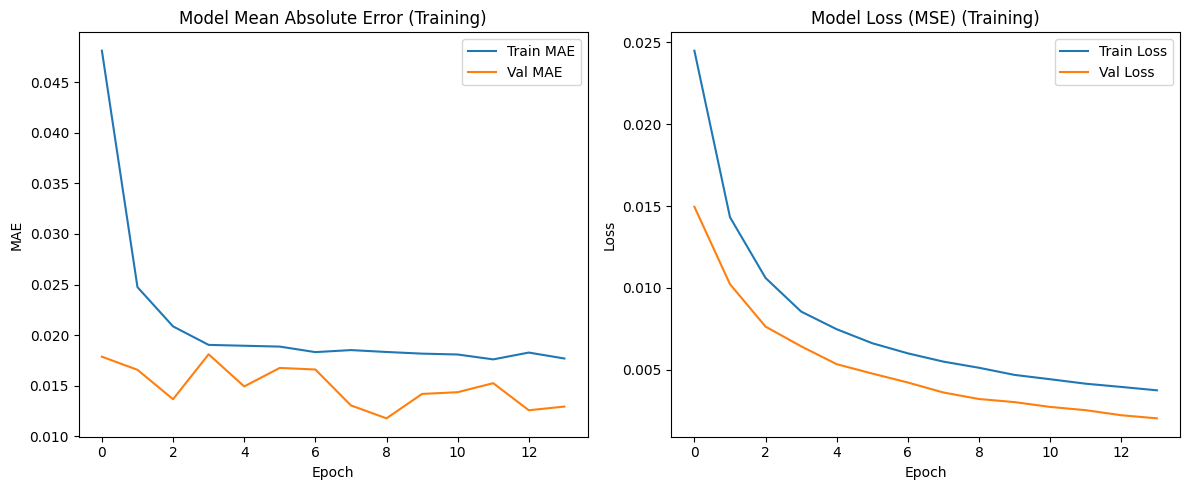

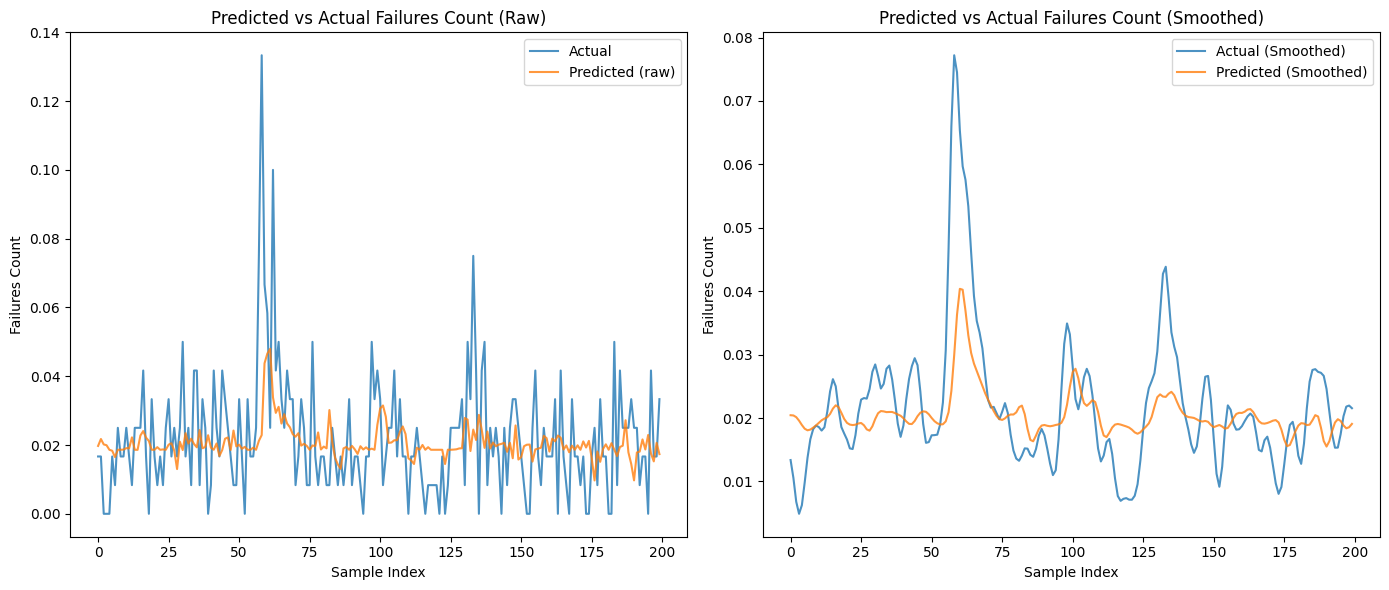

In [85]:
import matplotlib.pyplot as plt

# === 1️⃣ Training history ===
plt.figure(figsize=(12, 5))

# Plot MAE (raw during training)
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model Mean Absolute Error (Training)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Plot Loss (MSE during training)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss (MSE) (Training)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# === 2️⃣ Predictions vs Actuals (sequence data for failures_count) ===
plt.figure(figsize=(14, 6))

# Plot raw predictions vs actual (first 200 points for clarity)
plt.subplot(1, 2, 1)
plt.plot(y_test_seq[:200], label='Actual', alpha=0.8)
plt.plot(y_pred[:200], label='Predicted (raw)', alpha=0.8)
plt.title('Predicted vs Actual Failures Count (Raw)')
plt.xlabel('Sample Index')
plt.ylabel('Failures Count')
plt.legend()

# Plot smoothed predictions vs actual
plt.subplot(1, 2, 2)
plt.plot(y_test_smoothed[:200], label='Actual (Smoothed)', alpha=0.8)
plt.plot(y_pred_smoothed[:200], label='Predicted (Smoothed)', alpha=0.8)
plt.title('Predicted vs Actual Failures Count (Smoothed)')
plt.xlabel('Sample Index')
plt.ylabel('Failures Count')
plt.legend()

plt.tight_layout()
plt.show()




In [86]:
# =========================
# 9️⃣ Predict + inverse scale
# =========================
from scipy.ndimage import gaussian_filter1d

y_pred = model.predict(X_test_seq).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1,1)).flatten()
y_test_inv = scaler_y.inverse_transform(y_test_seq.reshape(-1,1)).flatten()

# Smooth for plotting
y_pred_smooth = gaussian_filter1d(y_pred_inv, sigma=1.5)
y_test_smooth = gaussian_filter1d(y_test_inv, sigma=1.5)

df_forecast = pd.DataFrame({
    'Day': daily_test['day'].iloc[window_size-1:window_size-1+len(y_test_seq)],
    'Actual_Failures': y_test_inv,
    'Predicted_Failures': y_pred_inv,
    'Actual_Failures_Smoothed': y_test_smooth,
    'Predicted_Failures_Smoothed': y_pred_smooth
})

print(df_forecast.head())

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
         Day  Actual_Failures  Predicted_Failures  Actual_Failures_Smoothed  \
2 2023-07-25              2.0            2.368127                  1.604805   
3 2023-07-26              2.0            2.609557                  1.265025   
4 2023-07-27              0.0            2.420432                  0.814650   
5 2023-07-28              0.0            2.392591                  0.587626   
6 2023-07-29              0.0            2.233937                  0.750196   

   Predicted_Failures_Smoothed  
2                     2.453231  
3                     2.448742  
4                     2.416760  
5                     2.350395  
6                     2.267954  


In [87]:
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter1d

# --- Parameters ---
FUTURE_STEPS = 3
window_size = X_test_seq.shape[1]  # must match training window

# --- Prepare last input sequence window from X_test_seq ---
X_last_window = np.expand_dims(X_test_seq[-1], axis=0)  # shape: (1, window_size, feature_dim)

# Use the last day from daily_data or test set
last_known_day = daily_data['day'].max()  # or df_test['day'].max()

future_scores = []
future_days = []

for step in range(1, FUTURE_STEPS + 1):
    pred_scaled = model.predict(X_last_window).flatten()[0]
    pred_score = scaler_y.inverse_transform([[pred_scaled]])[0, 0]
    future_scores.append(pred_score)

    next_day = last_known_day + pd.Timedelta(days=step)
    future_days.append(next_day)

    # Update rolling window
    last_step = X_last_window[0, -1, :].copy()
    new_window = np.concatenate([X_last_window[0, 1:, :], last_step[np.newaxis, :]], axis=0)
    X_last_window = np.expand_dims(new_window, axis=0)

# Build forecast DataFrame
df_future = pd.DataFrame({
    'Day': future_days,
    'Predicted_Failures_Smoothed': future_scores
})

# Smooth predictions
df_future['Predicted_Failures_Smoothed'] = gaussian_filter1d(df_future['Predicted_Failures_Smoothed'], sigma=1)

# Add placeholders for hover features
hover_features = [
    'score', 'total_count',
    'score_lag1', 'score_ratio',
    'score_roll_mean', 'score_roll_std',
    'score_delta'
]

df_future['Review_Summary'] = 'No reviews yet'
for f in hover_features:
    df_future[f] = np.nan

print("Future Forecast for Next 3 Days:")
print(df_future[['Day', 'Predicted_Failures_Smoothed']])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Future Forecast for Next 3 Days:
         Day  Predicted_Failures_Smoothed
0 2025-01-01                     1.026882
1 2025-01-02                     0.185674
2 2025-01-03                    -0.435859


In [88]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# =========================
# Hover Features (without reviews)
# =========================
hover_features = [
    'score', 'total_count',
    'score_lag1', 'score_ratio',
    'score_roll_mean', 'score_roll_std',
    'score_delta'
]

# =========================
# Merge Forecast + Features
# =========================
df_hover = (
    df_forecast.merge(
        daily_data[['day'] + hover_features],
        left_on='Day', right_on='day', how='left'
    )
)

df_hover = df_hover[['Day', 'Actual_Failures_Smoothed', 'Predicted_Failures_Smoothed'] + hover_features]

# =========================
# Future Forecast Placeholders
# =========================
for f in hover_features:
    df_future[f] = np.nan

# =========================
# Risk Threshold
# =========================
threshold = 10
df_hover['High_Risk'] = df_hover['Predicted_Failures_Smoothed'] > threshold
df_future['High_Risk'] = df_future['Predicted_Failures_Smoothed'] > threshold

# =========================
# Customdata for Hover (no reviews)
# =========================
def get_customdata(df_set):
    return np.stack([
        df_set.get('score', pd.Series(0)).fillna(0),
        df_set.get('score_lag1', pd.Series(0)).fillna(0),
        df_set.get('score_ratio', pd.Series(0)).fillna(0),
        df_set.get('score_roll_mean', pd.Series(0)).fillna(0),
        df_set.get('score_roll_std', pd.Series(0)).fillna(0),
        df_set.get('score_delta', pd.Series(0)).fillna(0),
        df_set.get('total_count', pd.Series(0)).fillna(0)
    ], axis=-1)

customdata_hover = get_customdata(pd.concat([df_hover, df_future], ignore_index=True))

# =========================
# Plotly Interactive Graph
# =========================
fig = go.Figure()

# --- Actual Failures ---
fig.add_trace(go.Scatter(
    x=df_hover['Day'],
    y=df_hover['Actual_Failures_Smoothed'],
    mode='lines+markers',
    name='Actual Failures',
    line=dict(color='blue', width=2),
    hovertemplate=(
        'Date: %{x}<br>Actual: %{y:.2f}<br>'
        'Score: %{customdata[0]:.2f}<br>'
        'Lag1: %{customdata[1]:.2f}<br>'
        'Ratio: %{customdata[2]:.2f}<br>'
        'Roll Mean: %{customdata[3]:.2f}<br>'
        'Roll Std: %{customdata[4]:.2f}<br>'
        'Delta: %{customdata[5]:.2f}<br>'
        'Total Count: %{customdata[6]:.0f}<extra></extra>'
    ),
    customdata=customdata_hover[:len(df_hover)]
))

# --- Predicted Failures (Historical) ---
fig.add_trace(go.Scatter(
    x=df_hover['Day'],
    y=df_hover['Predicted_Failures_Smoothed'],
    mode='lines+markers',
    name='Predicted Failures',
    line=dict(color='red', width=2),
    hovertemplate=(
        'Date: %{x}<br>Predicted: %{y:.2f}<br>'
        'Score: %{customdata[0]:.2f}<br>'
        'Lag1: %{customdata[1]:.2f}<br>'
        'Ratio: %{customdata[2]:.2f}<br>'
        'Roll Mean: %{customdata[3]:.2f}<br>'
        'Roll Std: %{customdata[4]:.2f}<br>'
        'Delta: %{customdata[5]:.2f}<br>'
        'Total Count: %{customdata[6]:.0f}<extra></extra>'
    ),
    customdata=customdata_hover[:len(df_hover)]
))

# --- Predicted Failures (Future Forecast) ---
fig.add_trace(go.Scatter(
    x=df_future['Day'],
    y=df_future['Predicted_Failures_Smoothed'],
    mode='lines+markers',
    name='Future Forecast',
    line=dict(color='orange', width=2, dash='dash'),
    hovertemplate=(
        'Date: %{x}<br>Forecast: %{y:.2f}<br>'
        'Score: %{customdata[0]:.2f}<br>'
        'Lag1: %{customdata[1]:.2f}<br>'
        'Ratio: %{customdata[2]:.2f}<br>'
        'Roll Mean: %{customdata[3]:.2f}<br>'
        'Roll Std: %{customdata[4]:.2f}<br>'
        'Delta: %{customdata[5]:.2f}<br>'
        'Total Count: %{customdata[6]:.0f}<extra></extra>'
    ),
    customdata=customdata_hover[len(df_hover):]
))

# --- Risk Zones ---
for df_set in [df_hover, df_future]:
    for i in range(len(df_set)):
        if df_set['High_Risk'].iloc[i]:
            fig.add_vrect(
                x0=df_set['Day'].iloc[i],
                x1=df_set['Day'].iloc[i] + pd.Timedelta(days=1),
                fillcolor="red",
                opacity=0.2,
                layer="below",
                line_width=0
            )

# --- Threshold Line ---
fig.add_hline(
    y=threshold,
    line=dict(color="orange", width=2, dash="dash"),
    annotation_text=f"Risk Threshold ({threshold})",
    annotation_position="bottom right"
)

# --- Layout ---
fig.update_layout(
    title='Time Series: Actual, Predicted, and Future Forecast with Risk Zones',
    xaxis_title='Date',
    yaxis_title='Failures Count',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()
